In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

Some methods require labels to be in "binary" type

In [2]:
def convert_to_binary(df):
    df.loc[df.Class == 'successful', 'Class'] = 1
    df.loc[df.Class == 'unsuccessful', 'Class'] = 0
    return df

Read dataset from csv files

In [3]:
testing_df = pd.read_csv("~/Downloads/Archive/testing.csv")
training_df = pd.read_csv("~/Downloads/Archive/training.csv")
reduced_df = pd.read_csv("~/Downloads/Archive/reducedSet.csv")
full_df = pd.read_csv("~/Downloads/Archive/fullSet.csv")

testing_df = convert_to_binary(testing_df)
training_df = convert_to_binary(training_df)

Divide dataframe to X's and Y's. Label values should be transposed

In [4]:
X_test, Y_test = testing_df[reduced_df['x']], testing_df.Class.tolist()
X_train, Y_train = training_df[reduced_df['x']], training_df.Class.tolist()

Center and scale date using Robust scaler.
Scale features using statistics that are robust to outliers.

In [5]:
scaler = RobustScaler(with_centering=True,
                      with_scaling=True).fit(X_test)
X_test = scaler.transform(X_test)
X_train = scaler.transform(X_train)

Tune hyperparams using GridSearch
hidden_layer_size = (units_in_layer, num_of_layers)
alpha = L2 penalty (regularization term) parameter

In [6]:
gs = GridSearchCV(MLPClassifier(solver='adam', random_state=1),
                  param_grid={'alpha': [0, 0.0001, 0.1, 1, 2],
                              'hidden_layer_sizes': [(4,), (5,), (6,), (8,)]},
                  scoring=make_scorer(roc_auc_score),
                  n_jobs=1)
gs.fit(X_train, Y_train)

/Users/andrew/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/andrew/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/andrew/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/andrew/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conver

GridSearchCV(cv=None, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0, 0.0001, 0.1, 1, 2], 'hidden_layer_sizes': [(4,), (5,), (6,), (8,)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(roc_auc_score), verbose=0)

In [7]:
gs.best_params_

{'alpha': 1, 'hidden_layer_sizes': (8,)}

In [8]:
gs.best_score_

0.7644608776363091

Train and predict Multi-layer Perceptron

In [9]:
clf = MLPClassifier(solver='adam',
                    random_state=1,
                    max_iter=500,
                    alpha=1,
                    hidden_layer_sizes=(8,))
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

Calculate confusion matrix

In [10]:
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[294,  35],
       [ 32, 157]])

Accuracy

In [11]:
(cm[0,0]+cm[1,1])/len(Y_test)

0.87065637065637069

Calculate ROC and Area under ROC

In [12]:
Y_pred_prob = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(Y_test, Y_pred_prob[:, 1])
under_roc = roc_auc_score(Y_test, Y_pred_prob[:, 1])
under_roc

0.93317894533700019

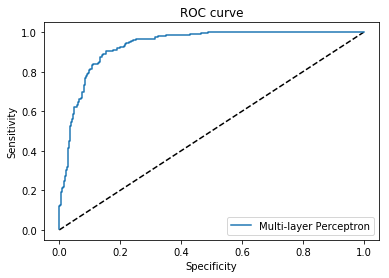

In [13]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Multi-layer Perceptron')
plt.xlabel('Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()